In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
#The number we want to guess using just one shot
secretnumber = '1010101001'

In [4]:
#Bernstein-Vazirani Algorithm

circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x((len(secretnumber)))
circuit.h((len(secretnumber)))

circuit.barrier()

#For every 1 in secret number we put a cx gate.
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

#Put another set of hadamard gates
circuit.h(range(len(secretnumber)))

#End of the Bernstein-Vazirani Algorithm

#Now we do the measurements
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

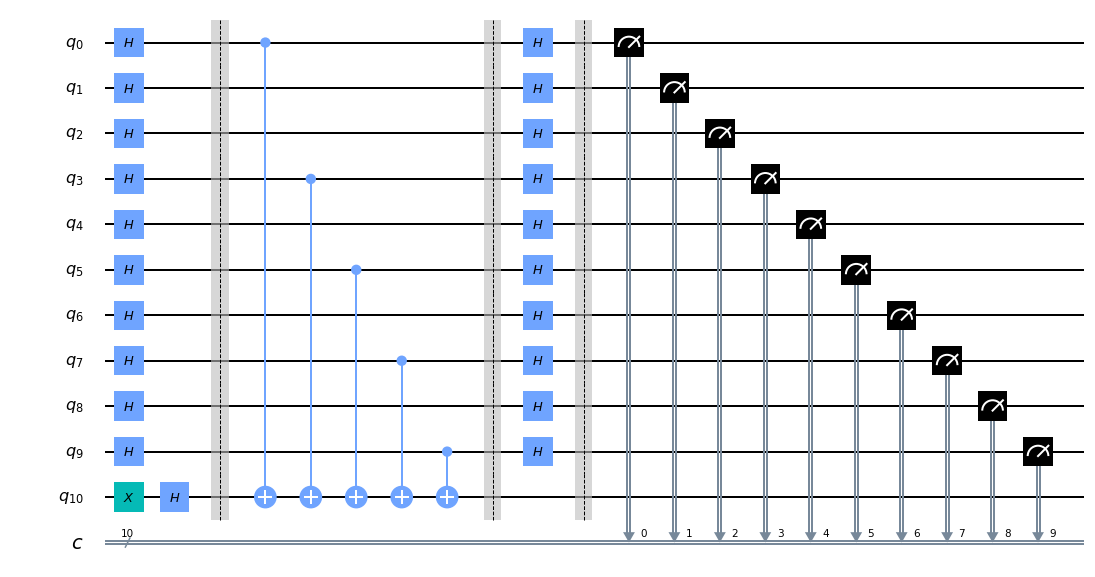

In [5]:
circuit.draw(output = 'mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010101001': 1}
